# Part A

**1000 force evaluations, 1 orbit**

In [21]:
import numpy as np
import matplotlib.pyplot as plt

**Defining Constants**

In [22]:
GM = 1 
a = 1  
e = 0.5 
P = 2*np.pi*np.sqrt(a**3/GM)
num_steps = 1000  # force evaluations per orbit
h = 2 * np.pi / num_steps  # Time step

**Analytical Ellipse Orbit**

In [23]:
E = np.linspace(0, 2 * np.pi, 1000)
b = a * np.sqrt(1 - e**2)  
ellipse = np.array([a * (np.cos(E) + e),b * np.sin(E)])

**Gravitational Force**

In [24]:
def gravitational_force(R):
    r = np.linalg.norm(R)  # Magnitude of the position vector
    r_hat = R / r  # unit vector
    F = -GM * r_hat / r**2
    return F

## Forward Euler

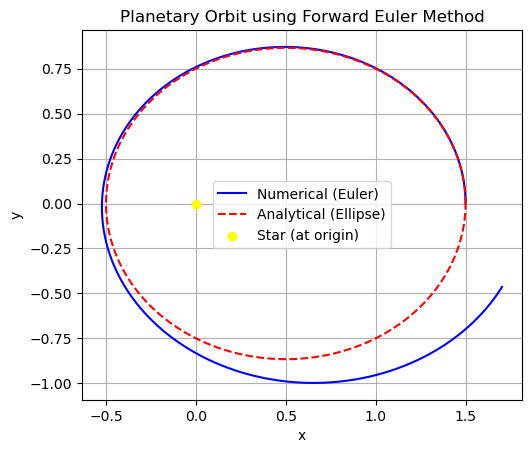

The error in position for forward euler is:  0.5065343107280142


In [25]:
# initial conditions
R = np.array([a*(1+e),0])
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))])

x_pos = [R[0]]
y_pos = [R[1]]

def forward_euler(R,V):
    F = gravitational_force(R)
    V_new = V + h * F
    R_new = R + h * V
    return V_new, R_new

for i in range(num_steps):
    V,R = forward_euler(R,V)
    x_pos.append(R[0])
    y_pos.append(R[1])


# Plotting the results
plt.figure()
plt.plot(x_pos, y_pos, label='Numerical (Euler)', color='blue')
plt.plot(ellipse[0], ellipse[1], label='Analytical (Ellipse)', color='red', linestyle='--')
plt.scatter(0, 0, color='yellow', label='Star (at origin)', zorder=5)  # The star is at the origin
plt.title('Planetary Orbit using Forward Euler Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

error_forward = np.sqrt((a*(1+e)-R[0])**2 + (0 - R[1])**2)
print('The error in position for forward euler is: ', error_forward)

## Modified Euler

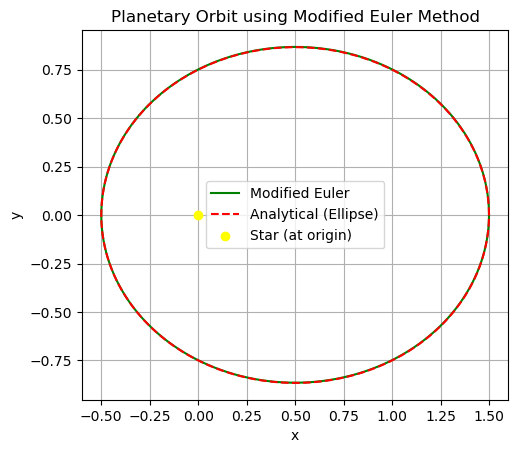

The error in position for modified euler is:  0.00023566442619034236


In [26]:
# initial conditions
R = np.array([a*(1+e),0])
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))])

x_pos_mod = [R[0]]
y_pos_mod = [R[1]]

def modified_euler(R,V):
    R_new = R + h * V
    F = gravitational_force(R_new)
    V_new = V + h * F
    return V_new, R_new

for i in range(num_steps):
    V,R = modified_euler(R,V)
    x_pos_mod.append(R[0])
    y_pos_mod.append(R[1])

# Plotting the results
plt.figure()
plt.plot(x_pos_mod, y_pos_mod, label= 'Modified Euler', color='green')
plt.plot(ellipse[0], ellipse[1], label='Analytical (Ellipse)', color='red', linestyle='--')
plt.scatter(0, 0, color='yellow', label='Star (at origin)', zorder=5)  # The star is at the origin
plt.title('Planetary Orbit using Modified Euler Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

error_mod = np.sqrt((a*(1+e)-R[0])**2 + (0 - R[1])**2)
print('The error in position for modified euler is: ', error_mod)

## Leapfrog

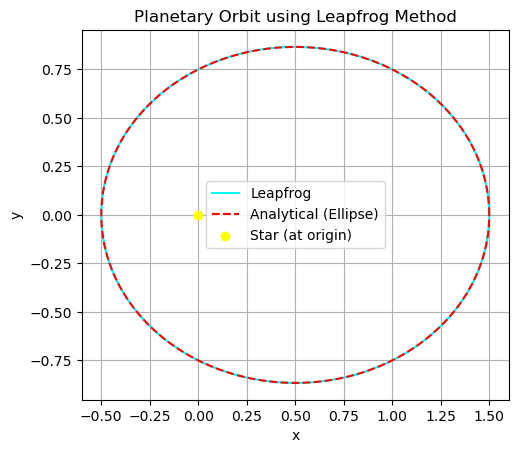

The error in position for Leapfrog is:  0.00023036023976029764


In [27]:
# initial conditions
R = np.array([a*(1+e),0])
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))])

x_pos_leap = [R[0]]
y_pos_leap = [R[1]]

def leapfrog(R,V):
    R_dash = R + (h/2) * V
    F = gravitational_force(R_dash)
    V_new = V + h * F
    R_new = R_dash + (h/2) * V_new
    return V_new, R_new

for i in range(num_steps):
    V,R = leapfrog(R,V)
    x_pos_leap.append(R[0])
    y_pos_leap.append(R[1])


# Plotting the results
plt.figure()
plt.plot(x_pos_leap, y_pos_leap, label= 'Leapfrog', color='cyan')
plt.plot(ellipse[0], ellipse[1], label='Analytical (Ellipse)', color='red', linestyle='--')
plt.scatter(0, 0, color='yellow', label='Star (at origin)', zorder=5)  # The star is at the origin
plt.title('Planetary Orbit using Leapfrog Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

error_leap = np.sqrt((a*(1+e)-R[0])**2 + (0 - R[1])**2)
print('The error in position for Leapfrog is: ', error_leap)

## Runge-Kutte (RK4)

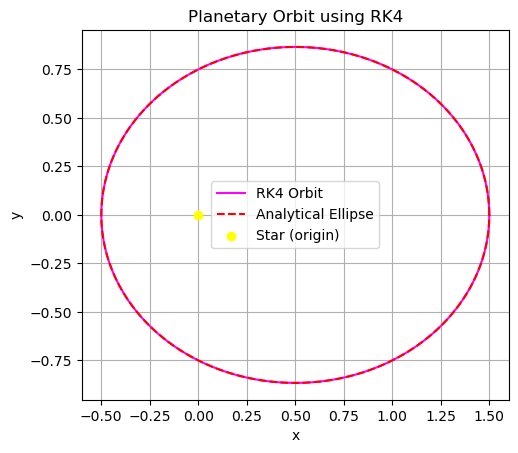

The error in position for RK4 is:  3.621083436340295e-06


In [28]:
num_steps = 250  # force evaluations per orbit
h = P / num_steps  # Time step

# Initial conditions
R = np.array([a * (1 + e), 0])  
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))])  
W = np.array([R, V]) 

x_pos_rk4, y_pos_rk4 = [R[0]], [R[1]]

def f(W):
    r = np.linalg.norm(W[0])  # Magnitude of position vector R
    return np.array([W[1], -GM * W[0] / r**3])  

def RK4(W):
    
    k1 = h * f(W)
    k2 = h * f(W + 0.5 * k1)
    k3 = h * f(W + 0.5 * k2)
    k4 = h * f(W + k3)
    W = W + (k1 + 2 * k2 + 2 * k3 + k4) / 6  
    return W
   
for i in range(num_steps):
    W = RK4(W)
    x_pos_rk4.append(W[0][0])
    y_pos_rk4.append(W[0][1])

# Plotting the results
plt.figure()
plt.plot(x_pos_rk4, y_pos_rk4, label='RK4 Orbit', color='magenta')
plt.plot(ellipse[0], ellipse[1], label='Analytical Ellipse', color='red', linestyle='--')
plt.scatter(0, 0, color='yellow', label='Star (origin)', zorder=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Planetary Orbit using RK4')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

error_rk4 = np.sqrt((a*(1+e)-W[0][0])**2 + (0 - W[0][1])**2)
print('The error in position for RK4 is: ', error_rk4)

## All Orbits Plotted

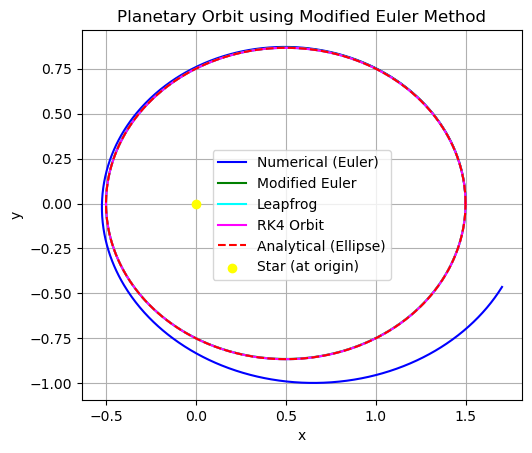

In [29]:
plt.figure()
plt.plot(x_pos, y_pos, label='Numerical (Euler)', color='blue')
plt.plot(x_pos_mod, y_pos_mod, label= 'Modified Euler', color='green')
plt.plot(x_pos_leap, y_pos_leap, label= 'Leapfrog', color='cyan')
plt.plot(x_pos_rk4, y_pos_rk4, label='RK4 Orbit', color='magenta')
plt.plot(ellipse[0], ellipse[1], label='Analytical (Ellipse)', color='red', linestyle='--')
plt.scatter(0, 0, color='yellow', label='Star (at origin)', zorder=5)  # The star is at the origin
plt.title('Planetary Orbit using Modified Euler Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

# Part B

## Conservation of Energy and Angular Momentum
Energy $= E = \frac{1}{2}(v_{x}^2 + v_{y}^2)-\frac{GM}{r}$

Angular Momentum $= L = xv_y - yv_x $

Conserved if $\frac{dE}{dT} = 0$ and $\frac{dL}{dT} = 0$

In [30]:
import sympy as sp

In [31]:
t = sp.symbols('t')
GM = sp.symbols('GM', real=True, positive=True)

x = sp.Function('x')(t)
y = sp.Function('y')(t)

vx = sp.Derivative(x, t)  # vx as the time derivative of x
vy = sp.Derivative(y, t)  # vy as the time derivative of y

r = sp.sqrt(x**2 + y**2)

### Conservation of Energy

In [32]:
E = 0.5 * (vx**2 + vy**2) - GM / r

E_dash = sp.diff(E, t)

# Substitute the gravitational accelerations for dvx/dt and dvy/dt
E_dash = E_dash.subs(sp.Derivative(vx, t), -GM * x / r**3)
E_dash = E_dash.subs(sp.Derivative(vy, t), -GM * y / r**3)

# Simplify the result to check for conservation
E_dash_simplified = sp.simplify(E_dash)
E_dash_simplified

0

### Conservation of Angular Momentum

In [33]:
L = x*vy - y*vx

L_dash = sp.diff(L, t)

# Substitute the gravitational accelerations for dvx/dt and dvy/dt
L_dash = L_dash.subs(sp.Derivative(vx, t), -GM * x / r**3)
L_dash = L_dash.subs(sp.Derivative(vy, t), -GM * y / r**3)

# Simplify the result to check for conservation
L_dash_simplified = sp.simplify(L_dash)
L_dash_simplified

0

## Error in Total Energy and Angular Momentum

try increase the length of time (more orbits) try increasing timestep and see if it fixes error 

In [34]:
import numpy as np
import matplotlib.pyplot as plt

**300 force evaluations, 100 orbits, e = 0.5**

In [35]:
N = 100
num_steps = 300
GM = 1 
a = 1 
e = 0.5
P = 2*np.pi*np.sqrt(a**3/GM)
h = 2 * np.pi / num_steps  # Time step

**300 force evaluations, 100 orbits, e = 0**

In [36]:
N = 100
num_steps = 300
GM = 1 
a = 1 
e = 0
P = 2*np.pi*np.sqrt(a**3/GM)
h = 2 * np.pi / num_steps  # Time step

Total Energy Error:

* Improves leapfrog error by around $10^5$

* RK4 error increases linearly with time

* For shorter times, improves modified Euler error, but then eventually reaches the same plateu

* No improvement for Forward Euler

Angular Momentum Error:

* RK4 and Forward Euler error looks identical to total energy error + no improvement in error

* No apparent improvement for leapfrog and modified euler

**2000 force evaluations, 100 orbits, e = 0.5**

In [37]:
N = 100
num_steps = 2000
GM = 1 
a = 1 
e = 0.5
P = 2*np.pi*np.sqrt(a**3/GM)
h = 2 * np.pi / num_steps  # Time step

Total Energy Error:

* Same for modified Euler

* Some imporvement for leapfrog of around the order of $10^2$

* Initial improvement for RK4 and forward Euler but error eventually reaches the same as before 

Angular Momentum Error:

* Same trends as for total energy, but modified and leapfrog show no improvemnt

* RK4 and forward Euler show initial improvement but error eventually reaches same value

See 2000 force evaluations, 1000 orbits to see that error reaches same value

**300 force evaluations, 1000 orbits, e = 0.5**

In [38]:
N = 1000
num_steps = 300
GM = 1 
a = 1 
e = 0.5
P = 2*np.pi*np.sqrt(a**3/GM)
h = 2 * np.pi / num_steps  # Time step

Total Energy Error:

* Leapfrog and modified have reached a plateu (same plateu as for 100 orbits

* Error in forward euler and RK4 continues to increase, although RK4 error is increasing at a faster rate

Angular Momentum Error:

* error in leapfrog and modified euler seems to be increasing very slowly

* RK4 error increasing

* forward euler method seems to be reaching a plateu of $10^0$

**2000 force evaluations, 1000 orbits, e = 0.5**

In [39]:
N = 1000
num_steps = 1000
GM = 1 
a = 1 
e = 0.5
P = 2*np.pi*np.sqrt(a**3/GM)
h = 2 * np.pi / num_steps  # Time step

Total Energy Error:

* Can see that RK4 and forward Euler error continues to climb, despite initially starting lower. It doesnt decrease the overall error and it will eventually catch up

* Modified euler and leapfrog errors stay at their plateu

Angular Momentum Error:

* Same trends for RK4 and forward Euler

* Slow increase in error for modified and leapfrog over time.

**Defining functions**

In [40]:
def energy(R, V):
    r = np.linalg.norm(R)
    return 0.5 * (V[0]**2 + V[1]**2) - GM / r
    
def angular_momentum(R, V):
    return (R[0] * V[1]) - (R[1] * V[0])

def energy_RK4(W):
    r = np.linalg.norm(W[0])
    return 0.5 * (W[1][0]**2 + W[1][1]**2) - GM / r

def angular_momentum_RK4(W):
    return (W[0][0] * W[1][1]) - (W[0][1] * W[1][0])

### Forward Euler

In [41]:
# Initial Conditions
R = np.array([a*(1+e), 0]) 
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))])  

E0 = energy(R,V)
L0 = angular_momentum(R, V)

x_pos = [R[0]]
y_pos = [R[1]]
energy_list = [E0]
angular_momentum_list = [L0]
time_list = [0]
t = 0

for i in range(N*num_steps):
    V, R = forward_euler(R, V)
    x_pos.append(R[0])
    y_pos.append(R[1])
    E = energy(R, V)
    L = angular_momentum(R, V)
    energy_list.append(E)
    angular_momentum_list.append(L)
    t = t + h
    time_list.append(t)

# fractional errors in energy and angular momentum
energy_error_forward = np.sqrt((energy_list - E0)**2)/np.sqrt(E0**2)
angular_momentum_error_forward = np.sqrt((angular_momentum_list - L0)**2)/np.sqrt(L0**2)

### Modified Euler

In [42]:
# Initial Conditions
R = np.array([a*(1+e), 0])
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))]) 

E0 = energy(R,V)
L0 = angular_momentum(R, V)

x_pos_mod = [R[0]]
y_pos_mod = [R[1]]
energy_list = [E0]
angular_momentum_list = [L0]
time_list = [0]
t = 0

for i in range(N*num_steps):
    V,R = modified_euler(R,V)
    x_pos_mod.append(R[0])
    y_pos_mod.append(R[1])
    E = energy(R, V)
    L = angular_momentum(R, V)
    energy_list.append(E)
    angular_momentum_list.append(L)
    t = t + h
    time_list.append(t)

# fractional errors in energy and angular momentum
energy_error_mod = np.sqrt((energy_list - E0)**2)/np.sqrt(E0**2)
angular_momentum_error_mod = np.sqrt((angular_momentum_list - L0)**2)/np.sqrt(L0**2)

### Leapfrog

In [43]:
# Initial Conditions
R = np.array([a*(1+e), 0]) 
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))])  

E0 = energy(R,V)
L0 = angular_momentum(R, V)

x_pos_leap = [R[0]]
y_pos_leap = [R[1]]
energy_list = [E0]
angular_momentum_list = [L0]
time_list = [0]
t = 0

for i in range(N*num_steps):
    V,R = leapfrog(R,V)
    x_pos_leap.append(R[0])
    y_pos_leap.append(R[1])
    E = energy(R, V)
    L = angular_momentum(R, V)
    energy_list.append(E)
    angular_momentum_list.append(L)
    t = t + h
    time_list.append(t)

# fractional errors in energy and angular momentum
energy_error_leap = np.sqrt((energy_list - E0)**2)/np.sqrt(E0**2)
angular_momentum_error_leap = np.sqrt((angular_momentum_list - L0)**2)/np.sqrt(L0**2)

### Runge Kutte (RK4)

In [44]:
# Initial Conditions
R = np.array([a*(1+e), 0])  
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))])  
W = np.array([R, V])  

E0 = energy_RK4(W)
L0 = angular_momentum_RK4(W)

x_pos_RK4 = [R[0]]
y_pos_RK4 = [R[1]]
energy_list = [E0]
angular_momentum_list = [L0]
time_list = [0]
t = 0

for i in range(N*num_steps):
    W = RK4(W)
    x_pos_rk4.append(W[0][0])
    y_pos_rk4.append(W[0][1])
    E = energy_RK4(W)
    L = angular_momentum_RK4(W)
    energy_list.append(E)
    angular_momentum_list.append(L)
    t = t + h
    time_list.append(t)

# fractional errors in energy and angular momentum
energy_error_RK4 = np.sqrt((energy_list - E0)**2)/np.sqrt(E0**2)
angular_momentum_error_RK4 = np.sqrt((angular_momentum_list - L0)**2)/np.sqrt(L0**2)

### Total Energy error Plot

/opt/conda/lib/python3.9/site-packages/IPython/core/events.py:93: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


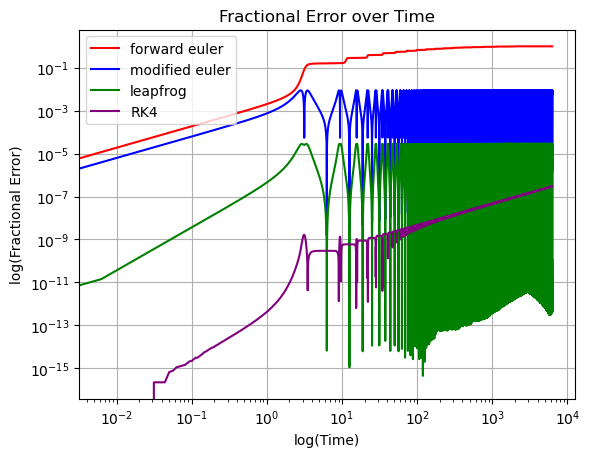

In [45]:
plt.figure()
plt.loglog(time_list, energy_error_forward, label='forward euler', color='red')
plt.loglog(time_list, energy_error_mod, label='modified euler', color='blue')
plt.loglog(time_list, energy_error_leap, label='leapfrog', color='green')
plt.loglog(time_list, energy_error_RK4, label='RK4', color='purple')
plt.title('Fractional Error over Time')
plt.xlabel('log(Time)')
plt.ylabel('log(Fractional Error)')
plt.legend()
plt.grid(True)

### Angular Momentum Error Plot

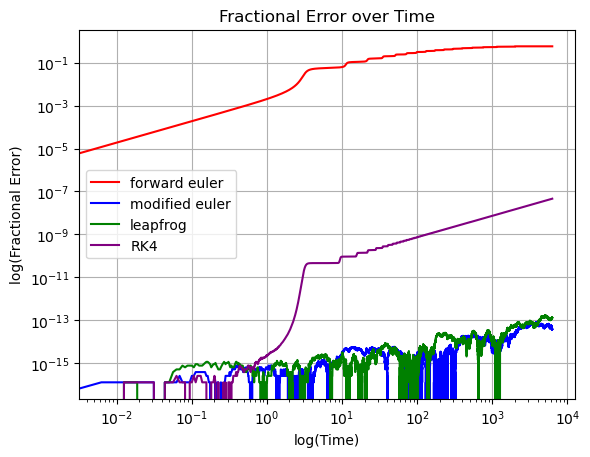

In [46]:
plt.figure()
plt.loglog(time_list, angular_momentum_error_forward, label='forward euler', color='red')
plt.loglog(time_list, angular_momentum_error_mod, label='modified euler', color='blue')
plt.loglog(time_list, angular_momentum_error_leap, label='leapfrog', color='green')
plt.loglog(time_list, angular_momentum_error_RK4, label='RK4', color='purple')
plt.title('Fractional Error over Time')
plt.xlabel('log(Time)')
plt.ylabel('log(Fractional Error)')
plt.legend()
plt.grid(True)

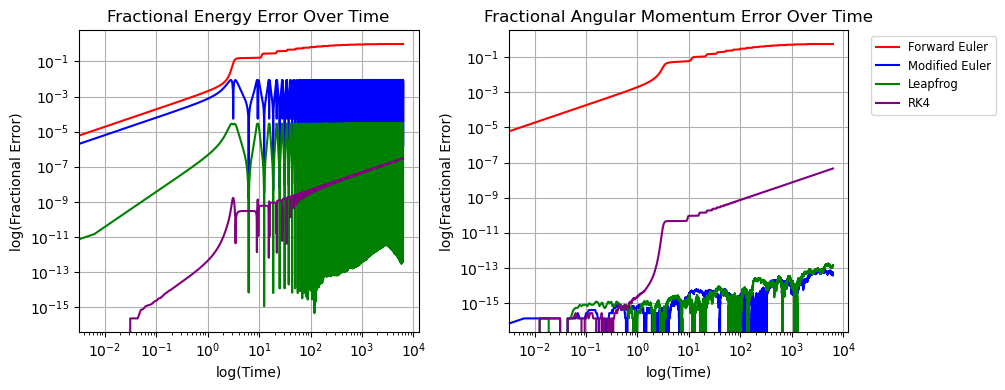

In [47]:
plt.figure(figsize=(12, 4))

plt.subplot(121)  
plt.loglog(time_list, energy_error_forward, label='Forward Euler', color='red')
plt.loglog(time_list, energy_error_mod, label='Modified Euler', color='blue')
plt.loglog(time_list, energy_error_leap, label='Leapfrog', color='green')
plt.loglog(time_list, energy_error_RK4, label='RK4', color='purple')
plt.title('Fractional Energy Error Over Time')
plt.xlabel('log(Time)')
plt.ylabel('log(Fractional Error)')
plt.grid(True)

plt.subplot(122)  
plt.loglog(time_list, angular_momentum_error_forward, label='Forward Euler', color='red')
plt.loglog(time_list, angular_momentum_error_mod, label='Modified Euler', color='blue')
plt.loglog(time_list, angular_momentum_error_leap, label='Leapfrog', color='green')
plt.loglog(time_list, angular_momentum_error_RK4, label='RK4', color='purple')
plt.title('Fractional Angular Momentum Error Over Time')
plt.xlabel('log(Time)')
plt.ylabel('log(Fractional Error)')
plt.grid(True)

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right for the legends

plt.show()


## Plotting Orbits

**Gravitaional Force**

In [48]:
def gravitational_force(R):
    r = np.linalg.norm(R)  # Magnitude of the position vector
    r_hat = R / r  # unit vector
    F = -GM * r_hat / r**2
    return F

**Analytical Ellipse**

In [49]:
E = np.linspace(0, 2 * np.pi, 1000)
b = a * np.sqrt(1 - e**2) 
ellipse = np.array([a * (np.cos(E) + e),b * np.sin(E)])

### Forward Euler

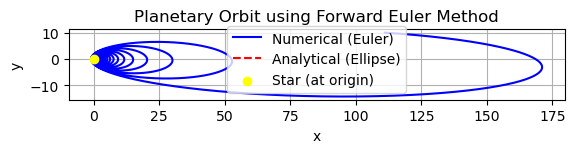

The error in position for forward euler is:  110.00642988925038


In [50]:
# initial conditions
R = np.array([a*(1+e),0])
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))])

x_pos = [R[0]]
y_pos = [R[1]]

def forward_euler(R,V):
    F = gravitational_force(R)
    V_new = V + h * F
    R_new = R + h * V
    return V_new, R_new

for i in range(N*num_steps):
    V,R = forward_euler(R,V)
    x_pos.append(R[0])
    y_pos.append(R[1])

# Plotting the results
plt.figure()
plt.plot(x_pos, y_pos, label='Numerical (Euler)', color='blue')
plt.plot(ellipse[0], ellipse[1], label='Analytical (Ellipse)', color='red', linestyle='--')
plt.scatter(0, 0, color='yellow', label='Star (at origin)', zorder=5)  # The star is at the origin
plt.title('Planetary Orbit using Forward Euler Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

error = np.sqrt((a*(1+e)-R[0])**2 + (0 - R[1])**2)
print('The error in position for forward euler is: ', error)

orbit has gone very very wrong

### Modified Euler

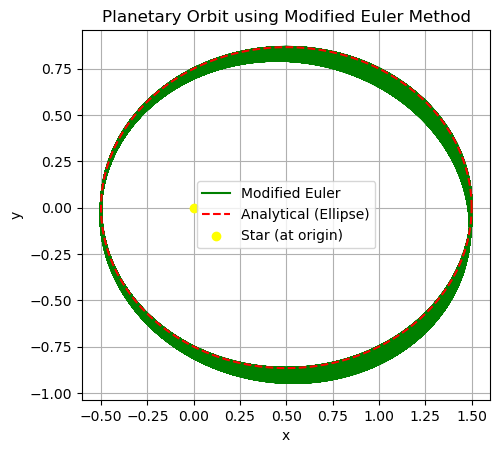

The error in position for modified euler is:  0.2354218073544093


In [51]:
# initial conditions
R = np.array([a*(1+e),0])
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))])

x_pos_mod = [R[0]]
y_pos_mod = [R[1]]


def modified_euler(R,V):
    R_new = R + h * V
    F = gravitational_force(R_new)
    V_new = V + h * F
    return V_new, R_new

for i in range(N*num_steps):
    V,R = modified_euler(R,V)
    x_pos_mod.append(R[0])
    y_pos_mod.append(R[1])


# Plotting the results
plt.figure()
plt.plot(x_pos_mod, y_pos_mod, label= 'Modified Euler', color='green')
plt.plot(ellipse[0], ellipse[1], label='Analytical (Ellipse)', color='red', linestyle='--')
plt.scatter(0, 0, color='yellow', label='Star (at origin)', zorder=5)  # The star is at the origin
plt.title('Planetary Orbit using Modified Euler Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

error = np.sqrt((a*(1+e)-R[0])**2 + (0 - R[1])**2)
print('The error in position for modified euler is: ', error)

### Leapfrog

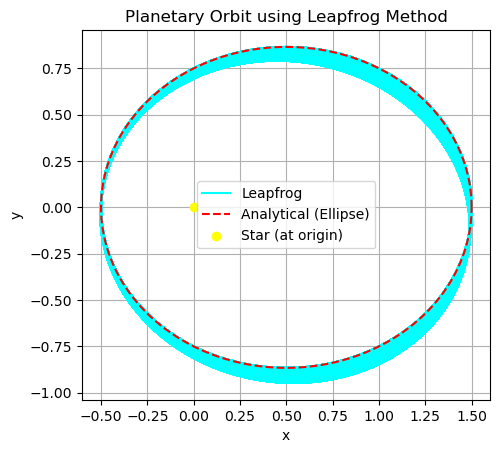

The error in position for Leapfrog is:  0.23013353683997062


In [52]:
# initial conditions
R = np.array([a*(1+e),0])
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))])

x_pos_leap = [R[0]]
y_pos_leap = [R[1]]

def leapfrog(R,V):
    R_dash = R + (h/2) * V
    F = gravitational_force(R_dash)
    V_new = V + h * F
    R_new = R_dash + (h/2) * V_new
    return V_new, R_new

for i in range(N*num_steps):
    V,R = leapfrog(R,V)
    x_pos_leap.append(R[0])
    y_pos_leap.append(R[1])

# Plotting the results
plt.figure()
plt.plot(x_pos_leap, y_pos_leap, label= 'Leapfrog', color='cyan')
plt.plot(ellipse[0], ellipse[1], label='Analytical (Ellipse)', color='red', linestyle='--')
plt.scatter(0, 0, color='yellow', label='Star (at origin)', zorder=5)  # The star is at the origin
plt.title('Planetary Orbit using Leapfrog Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

error = np.sqrt((a*(1+e)-R[0])**2 + (0 - R[1])**2)
print('The error in position for Leapfrog is: ', error)

### Runge Kutte (RK4)

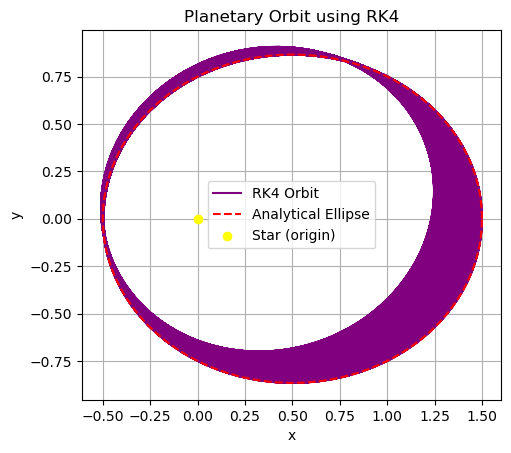

The error in position for RK4 is:  0.7001836174889785


In [53]:
num_steps = 75  # force evaluations per orbit
# num_steps = 500 

h = P / num_steps  # Time step

# Initial conditions
R = np.array([a * (1 + e), 0])  
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))]) 
W = np.array([R, V])  

x_pos_rk4, y_pos_rk4 = [R[0]], [R[1]]

def f(W):
    r = np.linalg.norm(W[0])  # Magnitude of position vector R
    return np.array([W[1], -GM * W[0] / r**3])  

def RK4(W):
    
    k1 = h * f(W)
    k2 = h * f(W + 0.5 * k1)
    k3 = h * f(W + 0.5 * k2)
    k4 = h * f(W + k3)
    W = W + (k1 + 2 * k2 + 2 * k3 + k4) / 6  
    return W
   
for i in range(N*num_steps):
    W = RK4(W)
    x_pos_rk4.append(W[0][0])
    y_pos_rk4.append(W[0][1])

# Plotting the results
plt.figure()
plt.plot(x_pos_rk4, y_pos_rk4, label='RK4 Orbit', color='purple')
plt.plot(ellipse[0], ellipse[1], label='Analytical Ellipse', color='red', linestyle='--')
plt.scatter(0, 0, color='yellow', label='Star (origin)', zorder=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Planetary Orbit using RK4')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

error = np.sqrt((a*(1+e)-W[0][0])**2 + (0 - W[0][1])**2)
print('The error in position for RK4 is: ', error)

/tmp/ipykernel_133/1373704680.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3.0)  # Add some padding between subplots


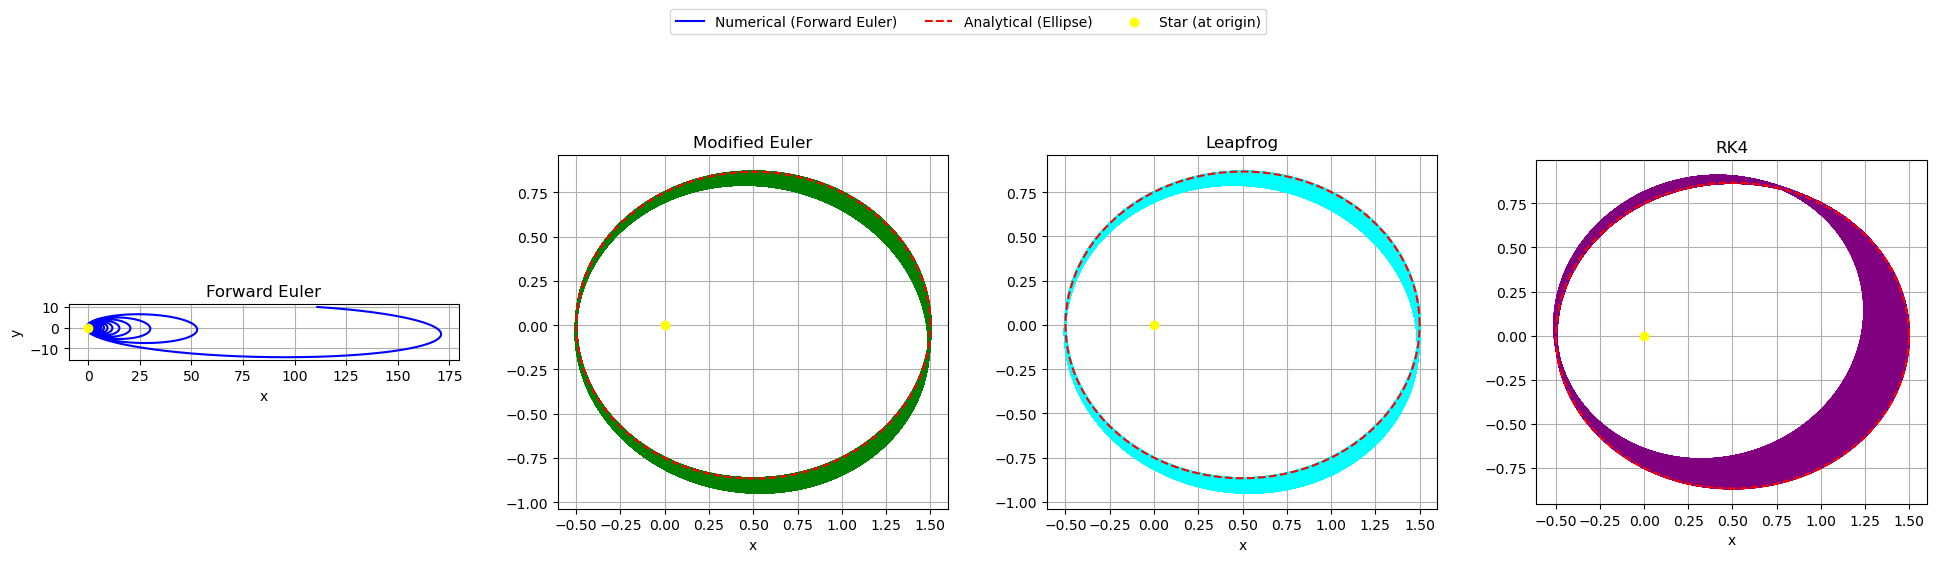

In [54]:
import matplotlib.pyplot as plt

# Create a figure with 1x4 subplots
fig, axes = plt.subplots(1, 4, figsize=(20, 6), constrained_layout=True)

# Plot Forward Euler
axes[0].plot(x_pos, y_pos, label='Numerical (Forward Euler)', color='blue')
axes[0].plot(ellipse[0], ellipse[1], label='Analytical (Ellipse)', color='red', linestyle='--')
axes[0].scatter(0, 0, color='yellow', label='Star (at origin)', zorder=5)
axes[0].set_title('Forward Euler')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].grid(True)
axes[0].set_aspect('equal', adjustable='box')

# Plot Modified Euler
axes[1].plot(x_pos_mod, y_pos_mod, label='Numerical (Modified Euler)', color='green')
axes[1].plot(ellipse[0], ellipse[1], label='Analytical (Ellipse)', color='red', linestyle='--')
axes[1].scatter(0, 0, color='yellow', zorder=5)
axes[1].set_title('Modified Euler')
axes[1].set_xlabel('x')
axes[1].grid(True)
axes[1].set_aspect('equal', adjustable='box')

# Plot Leapfrog
axes[2].plot(x_pos_leap, y_pos_leap, label='Numerical (Leapfrog)', color='cyan')
axes[2].plot(ellipse[0], ellipse[1], label='Analytical (Ellipse)', color='red', linestyle='--')
axes[2].scatter(0, 0, color='yellow', zorder=5)
axes[2].set_title('Leapfrog')
axes[2].set_xlabel('x')
axes[2].grid(True)
axes[2].set_aspect('equal', adjustable='box')

# Plot RK4
axes[3].plot(x_pos_rk4, y_pos_rk4, label='Numerical (RK4)', color='purple')
axes[3].plot(ellipse[0], ellipse[1], label='Analytical (Ellipse)', color='red', linestyle='--')
axes[3].scatter(0, 0, color='yellow', zorder=5)
axes[3].set_title('RK4')
axes[3].set_xlabel('x')
axes[3].grid(True)
axes[3].set_aspect('equal', adjustable='box')

# Add a single legend for all subplots, positioned outside
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=4, fontsize='medium')

# Adjust spacing
plt.tight_layout(pad=3.0)  # Add some padding between subplots
plt.show()



/tmp/ipykernel_133/873021930.py:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3.0)


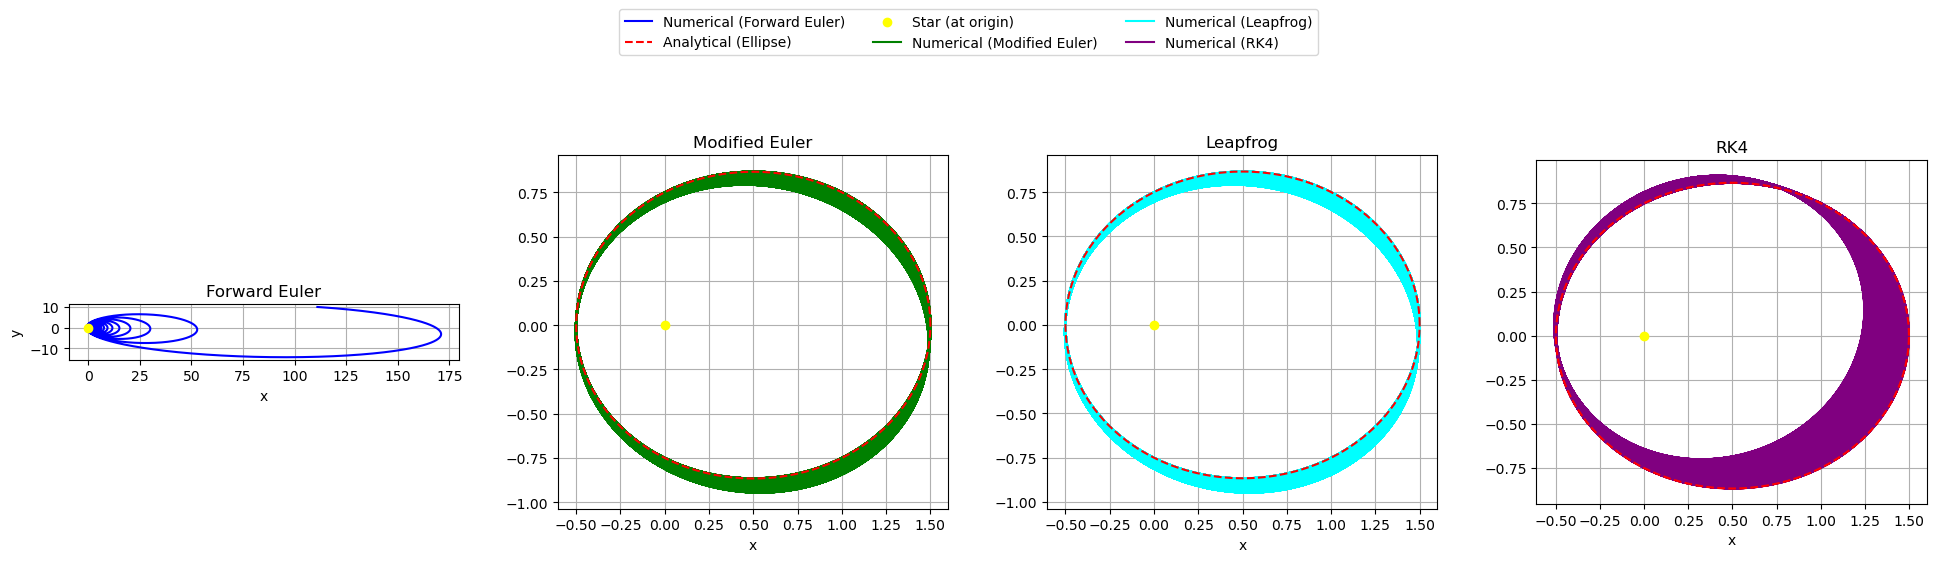

In [55]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6), constrained_layout=True)


axes[0].plot(x_pos, y_pos, label='Numerical (Forward Euler)', color='blue')
axes[0].plot(ellipse[0], ellipse[1], label='Analytical (Ellipse)', color='red', linestyle='--')
axes[0].scatter(0, 0, color='yellow', label='Star (at origin)', zorder=5)
axes[0].set_title('Forward Euler')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].grid(True)
axes[0].set_aspect('equal', adjustable='box')

axes[1].plot(x_pos_mod, y_pos_mod, label='Numerical (Modified Euler)', color='green')
axes[1].plot(ellipse[0], ellipse[1], color='red', linestyle='--')  
axes[1].scatter(0, 0, color='yellow', zorder=5)  
axes[1].set_title('Modified Euler')
axes[1].set_xlabel('x')
axes[1].grid(True)
axes[1].set_aspect('equal', adjustable='box')

axes[2].plot(x_pos_leap, y_pos_leap, label='Numerical (Leapfrog)', color='cyan')
axes[2].plot(ellipse[0], ellipse[1], color='red', linestyle='--')  
axes[2].scatter(0, 0, color='yellow', zorder=5)  
axes[2].set_title('Leapfrog')
axes[2].set_xlabel('x')
axes[2].grid(True)
axes[2].set_aspect('equal', adjustable='box')

axes[3].plot(x_pos_rk4, y_pos_rk4, label='Numerical (RK4)', color='purple')
axes[3].plot(ellipse[0], ellipse[1], color='red', linestyle='--')  
axes[3].scatter(0, 0, color='yellow', zorder=5) 
axes[3].set_title('RK4')
axes[3].set_xlabel('x')
axes[3].grid(True)
axes[3].set_aspect('equal', adjustable='box')


handles, labels = [], []
for ax in axes:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)


fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize='medium')


plt.tight_layout(pad=3.0)
plt.show()


## Error in Total Energy and Angular Momentum
**1000 force evaluations, 100 orbits, e = 0.9**

**Constants**

In [56]:
N = 100 # number of orbits
num_steps = 1000 # force evaluations per orbit
GM = 1 
a = 1  
e = 0.9 
P = 2*np.pi*np.sqrt(a**3/GM)
h = 2 * np.pi / num_steps  # Time step

**Defining Functions**

In [57]:
def energy(R, V):
    r = np.linalg.norm(R)
    return 0.5 * (V[0]**2 + V[1]**2) - GM / r
    
def angular_momentum(R, V):
    return (R[0] * V[1]) - (R[1] * V[0])

def energy_RK4(W):
    r = np.linalg.norm(W[0])
    return 0.5 * (W[1][0]**2 + W[1][1]**2) - GM / r

def angular_momentum_RK4(W):
    return (W[0][0] * W[1][1]) - (W[0][1] * W[1][0])

### Forward Euler

In [58]:
# Initial Conditions
R = np.array([a*(1+e), 0]) 
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))]) 

E0 = energy(R,V)
L0 = angular_momentum(R, V)

x_pos = [R[0]]
y_pos = [R[1]]
energy_list = [E0]
angular_momentum_list = [L0]
time_list = [0]
t = 0

for i in range(N*num_steps):
    V, R = forward_euler(R, V)
    x_pos.append(R[0])
    y_pos.append(R[1])
    E = energy(R, V)
    L = angular_momentum(R, V)
    energy_list.append(E)
    angular_momentum_list.append(L)
    t = t + h
    time_list.append(t)

# fractional errors in energy and angular momentum
energy_error_forward = np.sqrt((energy_list - E0)**2)/np.sqrt(E0**2)
angular_momentum_error_forward = np.sqrt((angular_momentum_list - L0)**2)/np.sqrt(L0**2)

### Modified Euler

In [59]:
# Initial Conditions
R = np.array([a*(1+e), 0]) 
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))])  

E0 = energy(R,V)
L0 = angular_momentum(R, V)

x_pos_mod = [R[0]]
y_pos_mod = [R[1]]
energy_list = [E0]
angular_momentum_list = [L0]
time_list = [0]
t = 0

for i in range(N*num_steps):
    V,R = modified_euler(R,V)
    x_pos_mod.append(R[0])
    y_pos_mod.append(R[1])
    E = energy(R, V)
    L = angular_momentum(R, V)
    energy_list.append(E)
    angular_momentum_list.append(L)
    t = t + h
    time_list.append(t)

# fractional errors in energy and angular momentum
energy_error_mod = np.sqrt((energy_list - E0)**2)/np.sqrt(E0**2)
angular_momentum_error_mod = np.sqrt((angular_momentum_list - L0)**2)/np.sqrt(L0**2)

### Leapfrog

In [60]:
# Initial Conditions
R = np.array([a*(1+e), 0])  
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))])  

E0 = energy(R,V)
L0 = angular_momentum(R, V)

x_pos_leap = [R[0]]
y_pos_leap = [R[1]]
energy_list = [E0]
angular_momentum_list = [L0]
time_list = [0]
t = 0

for i in range(N*num_steps):
    V,R = leapfrog(R,V)
    x_pos_leap.append(R[0])
    y_pos_leap.append(R[1])
    E = energy(R, V)
    L = angular_momentum(R, V)
    energy_list.append(E)
    angular_momentum_list.append(L)
    t = t + h
    time_list.append(t)

# fractional errors in energy and angular momentum
energy_error_leap = np.sqrt((energy_list - E0)**2)/np.sqrt(E0**2)
angular_momentum_error_leap = np.sqrt((angular_momentum_list - L0)**2)/np.sqrt(L0**2)

### Runge Kutte (RK4)

In [61]:
# Initial Conditions
R = np.array([a*(1+e), 0])  
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))]) 
W = np.array([R, V])  

E0 = energy_RK4(W)
L0 = angular_momentum_RK4(W)

x_pos_RK4 = [R[0]]
y_pos_RK4 = [R[1]]
energy_list = [E0]
angular_momentum_list = [L0]
time_list = [0]
t = 0

for i in range(N*num_steps):
    W = RK4(W)
    x_pos_rk4.append(W[0][0])
    y_pos_rk4.append(W[0][1])
    E = energy_RK4(W)
    L = angular_momentum_RK4(W)
    energy_list.append(E)
    angular_momentum_list.append(L)
    t = t + h
    time_list.append(t)

# fractional errors in energy and angular momentum
energy_error_RK4 = np.sqrt((energy_list - E0)**2)/np.sqrt(E0**2)
angular_momentum_error_RK4 = np.sqrt((angular_momentum_list - L0)**2)/np.sqrt(L0**2)

### Total Energy error Plot

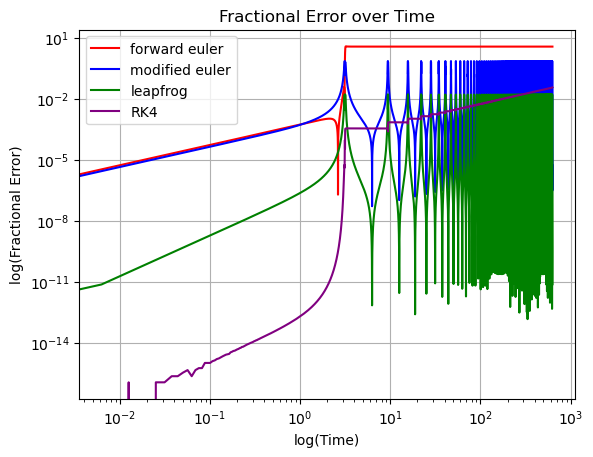

In [62]:
plt.figure()
plt.loglog(time_list, energy_error_forward, label='forward euler', color='red')
plt.loglog(time_list, energy_error_mod, label='modified euler', color='blue')
plt.loglog(time_list, energy_error_leap, label='leapfrog', color='green')
plt.loglog(time_list, energy_error_RK4, label='RK4', color='purple')
plt.title('Fractional Error over Time')
plt.xlabel('log(Time)')
plt.ylabel('log(Fractional Error)')
plt.legend()
plt.grid(True)

### Angular Momentum Error Plot

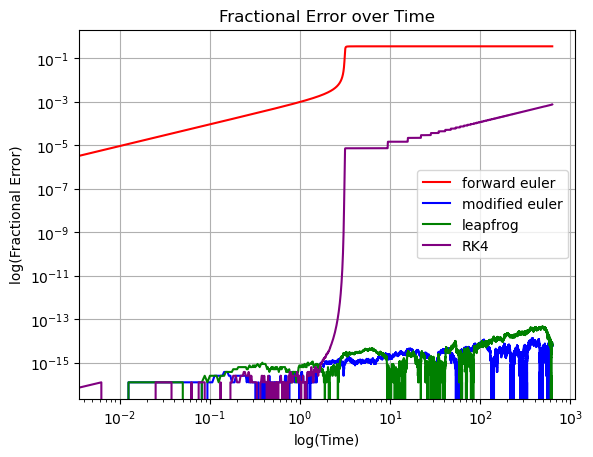

In [63]:
plt.figure()
plt.loglog(time_list, angular_momentum_error_forward, label='forward euler', color='red')
plt.loglog(time_list, angular_momentum_error_mod, label='modified euler', color='blue')
plt.loglog(time_list, angular_momentum_error_leap, label='leapfrog', color='green')
plt.loglog(time_list, angular_momentum_error_RK4, label='RK4', color='purple')
plt.title('Fractional Error over Time')
plt.xlabel('log(Time)')
plt.ylabel('log(Fractional Error)')
plt.legend()
plt.grid(True)

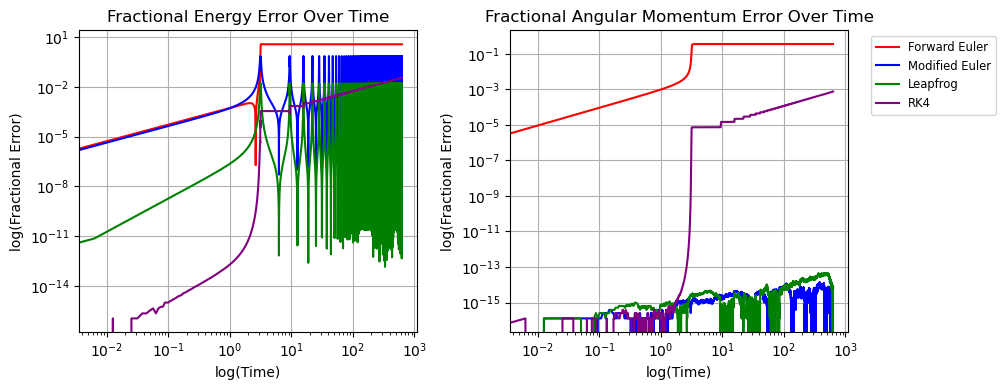

In [64]:
plt.figure(figsize=(12, 4))

plt.subplot(121)  
plt.loglog(time_list, energy_error_forward, label='Forward Euler', color='red')
plt.loglog(time_list, energy_error_mod, label='Modified Euler', color='blue')
plt.loglog(time_list, energy_error_leap, label='Leapfrog', color='green')
plt.loglog(time_list, energy_error_RK4, label='RK4', color='purple')
plt.title('Fractional Energy Error Over Time')
plt.xlabel('log(Time)')
plt.ylabel('log(Fractional Error)')
plt.grid(True)

plt.subplot(122)  
plt.loglog(time_list, angular_momentum_error_forward, label='Forward Euler', color='red')
plt.loglog(time_list, angular_momentum_error_mod, label='Modified Euler', color='blue')
plt.loglog(time_list, angular_momentum_error_leap, label='Leapfrog', color='green')
plt.loglog(time_list, angular_momentum_error_RK4, label='RK4', color='purple')
plt.title('Fractional Angular Momentum Error Over Time')
plt.xlabel('log(Time)')
plt.ylabel('log(Fractional Error)')
plt.grid(True)

plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Leave space on the right for the legends

plt.show()

## Plotting Orbits
**1000 force evaluations, 100 orbits, e = 0.9**

In [65]:
import numpy as np
import matplotlib.pyplot as plt

**Constants**

In [66]:
GM = 1 
a = 1   
e = 0.9 
P = 2*np.pi*np.sqrt(a**3/GM)
num_steps = 1000  # force evaluations per orbit
h = 2 * np.pi / num_steps  # Time step
N = 100

**Gravitaional Force**

In [67]:
def gravitational_force(R):
    r = np.linalg.norm(R)  # Magnitude of the position vector
    r_hat = R / r  # unit vector
    F = -GM * r_hat / r**2
    return F

**Analytical Ellipse Orbit**

In [68]:
E = np.linspace(0, 2 * np.pi, 1000)
b = a * np.sqrt(1 - e**2)  
ellipse = np.array([a * (np.cos(E) + e),b * np.sin(E)])

### Forward Euler

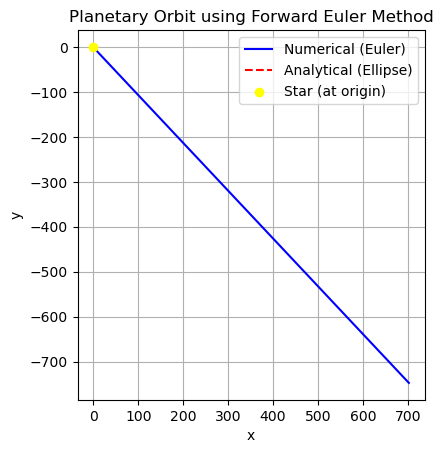

The error in position for forward euler is:  1024.6042447181867


In [69]:
# initial conditions
R = np.array([a*(1+e),0])
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))])

x_pos = [R[0]]
y_pos = [R[1]]

def forward_euler(R,V):
    F = gravitational_force(R)
    V_new = V + h * F
    R_new = R + h * V
    return V_new, R_new

for i in range(N*num_steps):
    V,R = forward_euler(R,V)
    x_pos.append(R[0])
    y_pos.append(R[1])

# Plotting the results
plt.figure()
plt.plot(x_pos, y_pos, label='Numerical (Euler)', color='blue')
plt.plot(ellipse[0], ellipse[1], label='Analytical (Ellipse)', color='red', linestyle='--')
plt.scatter(0, 0, color='yellow', label='Star (at origin)', zorder=5)  # The star is at the origin
plt.title('Planetary Orbit using Forward Euler Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

error = np.sqrt((a*(1+e)-R[0])**2 + (0 - R[1])**2)
print('The error in position for forward euler is: ', error)

**Zooming in on Forward Euler orbits**

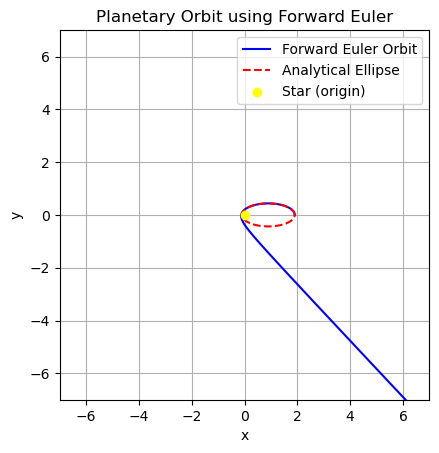

In [70]:
orbit_range =  7 # Adjust to zoom into the expected orbit area

plt.figure()

plt.plot(x_pos, y_pos, label='Forward Euler Orbit', color='blue', markersize=2, linestyle='-')
plt.plot(ellipse[0], ellipse[1], label='Analytical Ellipse', color='red', linestyle='--')
plt.scatter(0, 0, color='yellow', label='Star (origin)', zorder=5)
plt.xlim(-orbit_range, orbit_range)
plt.ylim(-orbit_range, orbit_range)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Planetary Orbit using Forward Euler')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)

plt.show()

### Modified Euler

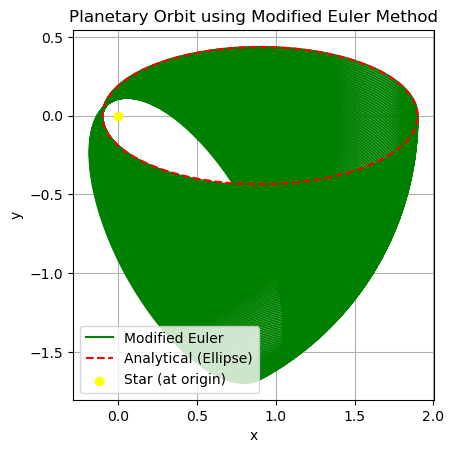

The error in position for modified euler is:  1.9469879255859874


In [71]:
# initial conditions
R = np.array([a*(1+e),0])
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))])

x_pos_mod = [R[0]]
y_pos_mod = [R[1]]

def modified_euler(R,V):
    R_new = R + h * V
    F = gravitational_force(R_new)
    V_new = V + h * F
    return V_new, R_new

for i in range(N*num_steps):
    V,R = modified_euler(R,V)
    x_pos_mod.append(R[0])
    y_pos_mod.append(R[1])

# Plotting the results
plt.figure()
plt.plot(x_pos_mod, y_pos_mod, label= 'Modified Euler', color='green')
plt.plot(ellipse[0], ellipse[1], label='Analytical (Ellipse)', color='red', linestyle='--')
plt.scatter(0, 0, color='yellow', label='Star (at origin)', zorder=5)  # The star is at the origin
plt.title('Planetary Orbit using Modified Euler Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

error = np.sqrt((a*(1+e)-R[0])**2 + (0 - R[1])**2)
print('The error in position for modified euler is: ', error)

### Leapfrog

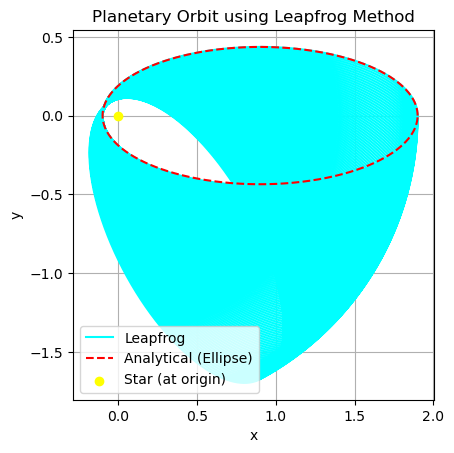

The error in position for Leapfrog is:  1.9469684501618405


In [72]:
# initial conditions
R = np.array([a*(1+e),0])
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))])

x_pos_leap = [R[0]]
y_pos_leap = [R[1]]

def leapfrog(R,V):
    R_dash = R + (h/2) * V
    F = gravitational_force(R_dash)
    V_new = V + h * F
    R_new = R_dash + (h/2) * V_new
    return V_new, R_new

for i in range(N*num_steps):
    V,R = leapfrog(R,V)
    x_pos_leap.append(R[0])
    y_pos_leap.append(R[1])

# Plotting the results
plt.figure()
plt.plot(x_pos_leap, y_pos_leap, label= 'Leapfrog', color='cyan')
plt.plot(ellipse[0], ellipse[1], label='Analytical (Ellipse)', color='red', linestyle='--')
plt.scatter(0, 0, color='yellow', label='Star (at origin)', zorder=5)  # The star is at the origin
plt.title('Planetary Orbit using Leapfrog Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

error = np.sqrt((a*(1+e)-R[0])**2 + (0 - R[1])**2)
print('The error in position for Leapfrog is: ', error)

### Runge-Kutte (RK4)
**250 force evaluations, 100 orbits, e = 0.9**

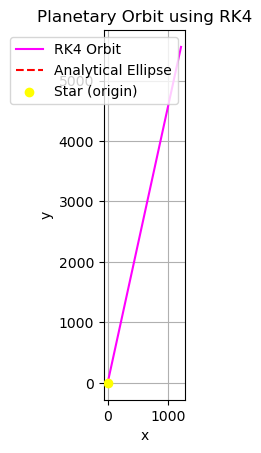

The error in position for RK4 is:  5686.365338247567


In [73]:
num_steps = 250  # force evaluations per orbit
h = P / num_steps  # Time step

# Initial conditions
R = np.array([a * (1 + e), 0])
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))]) 
W = np.array([R, V]) 

x_pos_rk4 = [R[0]]
y_pos_rk4 = [R[1]]

def f(W):
    r = np.linalg.norm(W[0])  # Magnitude of position vector R
    return np.array([W[1], -GM * W[0] / r**3])  

def RK4(W):
    
    k1 = h * f(W)
    k2 = h * f(W + 0.5 * k1)
    k3 = h * f(W + 0.5 * k2)
    k4 = h * f(W + k3)
    W = W + (k1 + 2 * k2 + 2 * k3 + k4) / 6  
    return W
   
for i in range(N*num_steps):
    W = RK4(W)
    x_pos_rk4.append(W[0][0])
    y_pos_rk4.append(W[0][1])

# Plotting the results
plt.figure()
plt.plot(x_pos_rk4, y_pos_rk4, label='RK4 Orbit', color='magenta')
plt.plot(ellipse[0], ellipse[1], label='Analytical Ellipse', color='red', linestyle='--')
plt.scatter(0, 0, color='yellow', label='Star (origin)', zorder=5)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Planetary Orbit using RK4')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

error = np.sqrt((a*(1+e)-W[0][0])**2 + (0 - W[0][1])**2)
print('The error in position for RK4 is: ', error)

**Zooming in on RK4 orbit**

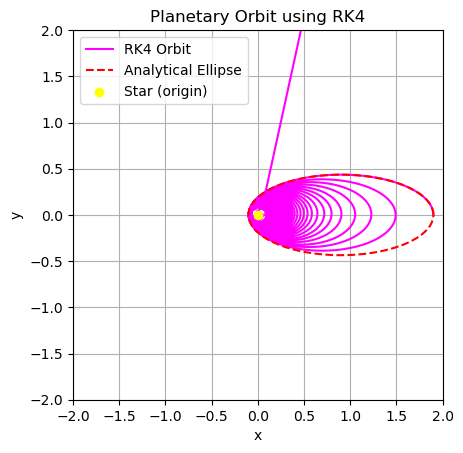

In [74]:
orbit_range =  2 # Adjust to zoom into the expected orbit area

plt.figure()

plt.plot(x_pos_rk4, y_pos_rk4, label='RK4 Orbit', color='magenta', linestyle='-')
plt.plot(ellipse[0], ellipse[1], label='Analytical Ellipse', color='red', linestyle='--')
plt.scatter(0, 0, color='yellow', label='Star (origin)', zorder=5)
plt.xlim(-orbit_range, orbit_range)
plt.ylim(-orbit_range, orbit_range)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Planetary Orbit using RK4')
plt.legend()
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)


plt.show()

/tmp/ipykernel_133/1368042591.py:52: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3.0)


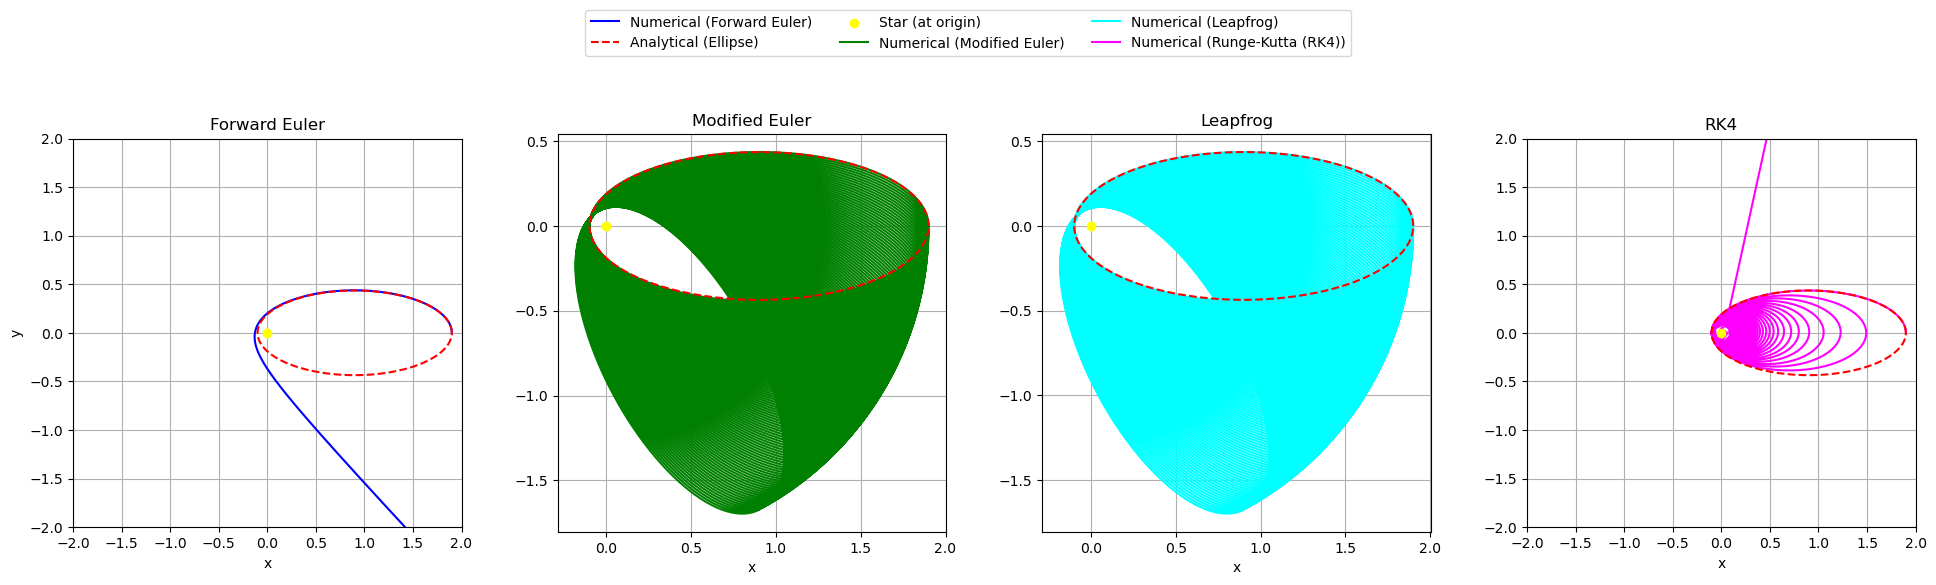

In [75]:
fig, axes = plt.subplots(1, 4, figsize=(20, 6), constrained_layout=True)


axes[0].plot(x_pos, y_pos, label='Numerical (Forward Euler)', color='blue')
axes[0].plot(ellipse[0], ellipse[1], label='Analytical (Ellipse)', color='red', linestyle='--')
axes[0].set_xlim(-2, 2)
axes[0].set_ylim(-2, 2)  
axes[0].scatter(0, 0, color='yellow', label='Star (at origin)', zorder=5)
axes[0].set_title('Forward Euler')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].grid(True)
axes[0].set_aspect('equal', adjustable='box')

axes[1].plot(x_pos_mod, y_pos_mod, label='Numerical (Modified Euler)', color='green')
axes[1].plot(ellipse[0], ellipse[1], color='red', linestyle='--')  
axes[1].scatter(0, 0, color='yellow', zorder=5)  
axes[1].set_title('Modified Euler')
axes[1].set_xlabel('x')
axes[1].grid(True)
axes[1].set_aspect('equal', adjustable='box')

axes[2].plot(x_pos_leap, y_pos_leap, label='Numerical (Leapfrog)', color='cyan')
axes[2].plot(ellipse[0], ellipse[1], color='red', linestyle='--')  
axes[2].scatter(0, 0, color='yellow', zorder=5)  
axes[2].set_title('Leapfrog')
axes[2].set_xlabel('x')
axes[2].grid(True)
axes[2].set_aspect('equal', adjustable='box')

axes[3].plot(x_pos_rk4, y_pos_rk4, label='Numerical (Runge-Kutta (RK4))', color='magenta')
axes[3].plot(ellipse[0], ellipse[1], color='red', linestyle='--')
axes[3].set_xlim(-2, 2)  
axes[3].set_ylim(-2, 2)  
axes[3].scatter(0, 0, color='yellow', zorder=5)
axes[3].set_title('RK4')
axes[3].set_xlabel('x')
axes[3].grid(True)
axes[3].set_aspect('equal', adjustable='box')


handles, labels = [], []
for ax in axes:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)


fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize='medium')


plt.tight_layout(pad=3.0)
plt.show()

/tmp/ipykernel_133/2035993328.py:34: UserWarning: The figure layout has changed to tight
  plt.tight_layout(pad=3.0)


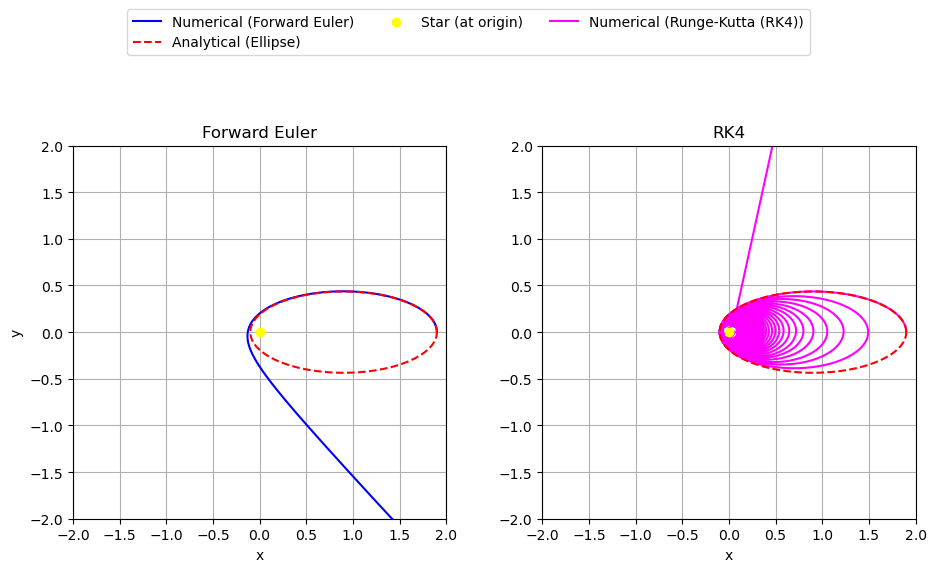

In [76]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 6), constrained_layout=True)

axes[0].plot(x_pos, y_pos, label='Numerical (Forward Euler)', color='blue')
axes[0].plot(ellipse[0], ellipse[1], label='Analytical (Ellipse)', color='red', linestyle='--')
axes[0].set_xlim(-2, 2)
axes[0].set_ylim(-2, 2)  
axes[0].scatter(0, 0, color='yellow', label='Star (at origin)', zorder=5)
axes[0].set_title('Forward Euler')
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].grid(True)
axes[0].set_aspect('equal', adjustable='box')

axes[1].plot(x_pos_rk4, y_pos_rk4, label='Numerical (Runge-Kutta (RK4))', color='magenta')
axes[1].plot(ellipse[0], ellipse[1], color='red', linestyle='--')
axes[1].set_xlim(-2, 2)  
axes[1].set_ylim(-2, 2)  
axes[1].scatter(0, 0, color='yellow', zorder=5)
axes[1].set_title('RK4')
axes[1].set_xlabel('x')
axes[1].grid(True)
axes[1].set_aspect('equal', adjustable='box')

handles, labels = [], []
for ax in axes:
    h, l = ax.get_legend_handles_labels()
    handles.extend(h)
    labels.extend(l)

fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fontsize='medium')

plt.tight_layout(pad=3.0)

plt.show()


# Part C
**Integrating Forward for 10 orbits with 300 force evaluations and e = 0.5, and then reversing velocity and integrating backwards in time**

In [136]:
import numpy as np
import matplotlib.pyplot as plt

**Constants**

In [137]:
GM = 1 
a = 1   
e = 0.5 
P = 2 * np.pi * np.sqrt(a**3 / GM)  # Orbital period
num_steps = 1000  # force evaluations per orbit
h = 2 * np.pi / num_steps  # Time step
N = 10  # number of orbits to integrate forward and then backward

**Gravitational Force**

In [138]:
def gravitational_force(R):
    r = np.linalg.norm(R)  # Magnitude of the position vector
    r_hat = R / r  # unit vector
    F = -GM * r_hat / r**2
    return F

**Analytical Ellipse Orbit**

In [139]:
E = np.linspace(0, 2 * np.pi, 1000)
b = a * np.sqrt(1 - e**2) 
ellipse = np.array([a * (np.cos(E) + e),b * np.sin(E)])

## Forward Euler

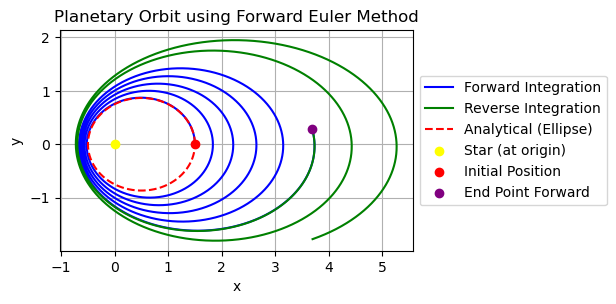

Position error after time-reversal: 2.8275184467693615
Velocity error after time-reversal: 0.5814495098043455
Time-reversibility: No


In [140]:
# Initial conditions
R = np.array([a * (1 + e), 0]) 
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))]) 

x_pos = []
y_pos = []
x_pos_back = []
y_pos_back = []

# Forward Euler integration function
def forward_euler(R, V):
    F = gravitational_force(R)
    V_new = V + h * F
    R_new = R + h * V
    return V_new, R_new

for i in range(N * num_steps):
    V, R = forward_euler(R, V)
    x_pos.append(R[0])
    y_pos.append(R[1])

V = -V

# Integrate backward in time
for i in range(N * num_steps):
    V, R = forward_euler(R, V) 
    x_pos_back.append(R[0])
    y_pos_back.append(R[1])

V = -V

# Plotting the results
plt.figure()
plt.plot(x_pos, y_pos, label='Forward Integration', color='blue')
plt.plot(x_pos_back, y_pos_back, label = 'Reverse Integration', color = 'green')
plt.plot(ellipse[0], ellipse[1], label='Analytical (Ellipse)', color='red', linestyle='--')
plt.scatter(0, 0, color='yellow', label='Star (at origin)', zorder=5)  # The star is at the origin
plt.scatter(a * (1 + e), 0, color='red', label='Initial Position', zorder=5)
plt.scatter(x_pos[-1], y_pos[-1], color='purple', label='End Point Forward', zorder=5)  # Final point of forward integration
plt.title('Planetary Orbit using Forward Euler Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# Error between initial and final positions and velocities
position_error = np.linalg.norm(R - np.array([a * (1 + e), 0]))
velocity_error = np.linalg.norm(V - np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))]))

print(f"Position error after time-reversal: {position_error}")
print(f"Velocity error after time-reversal: {velocity_error}")

is_time_reversible = position_error < 1e-10 and velocity_error < 1e-10
print("Time-reversibility:", "Yes" if is_time_reversible else "No")

## Modified Euler

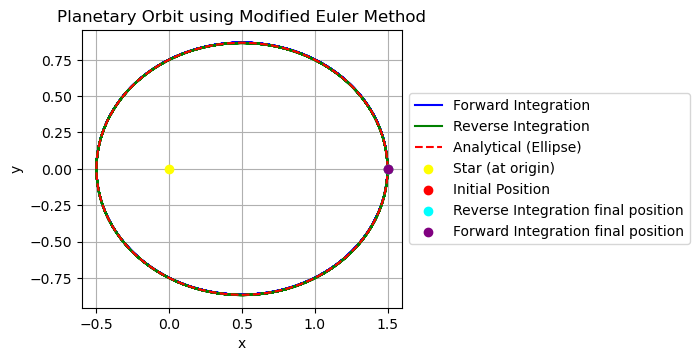

Position error after time-reversal: 1.6652887038432875e-06
Velocity error after time-reversal: 1.2811977673563848e-06
Time-reversibility: No


In [141]:
# initial conditions
R = np.array([a*(1+e),0])
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))])

x_pos_mod = [R[0]]
y_pos_mod = [R[1]]
x_pos_mod_back = []
y_pos_mod_back = []

def modified_euler(R,V):
    R_new = R + h * V
    F = gravitational_force(R_new)
    V_new = V + h * F
    return V_new, R_new

for i in range(N*num_steps):
    V,R = modified_euler(R,V)
    x_pos_mod.append(R[0])
    y_pos_mod.append(R[1])

V = -V

# Integrate backward in time
for i in range(N * num_steps):
    V, R = modified_euler(R, V) 
    x_pos_mod_back.append(R[0])
    y_pos_mod_back.append(R[1])

V = -V

# Plotting the results
plt.figure()
plt.plot(x_pos_mod, y_pos_mod, label='Forward Integration', color='blue')
plt.plot(x_pos_mod_back, y_pos_mod_back, label='Reverse Integration', color='green')
plt.plot(ellipse[0], ellipse[1], label='Analytical (Ellipse)', color='red', linestyle='--')
plt.scatter(0, 0, color='yellow', label='Star (at origin)', zorder=5)  # The star is at the origin
plt.scatter(a * (1 + e), 0, color='red', label='Initial Position', zorder=5)
plt.scatter(x_pos_mod_back[-1], y_pos_mod_back[-1], color='cyan', label='Reverse Integration final position', zorder=5)
plt.scatter(x_pos_mod[-1], y_pos_mod[-1], color='purple', label='Forward Integration final position', zorder=5)  # Final point of forward integration
plt.title('Planetary Orbit using Modified Euler Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()  # Adjust layout to fit the legend outside
plt.show()

# Error between initial and final positions and velocities
position_error = np.linalg.norm(R - np.array([a * (1 + e), 0]))
velocity_error = np.linalg.norm(V - np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))]))

print(f"Position error after time-reversal: {position_error}")
print(f"Velocity error after time-reversal: {velocity_error}")

is_time_reversible = position_error < 1e-10 and velocity_error < 1e-10
print("Time-reversibility:", "Yes" if is_time_reversible else "No")

## Leapfrog

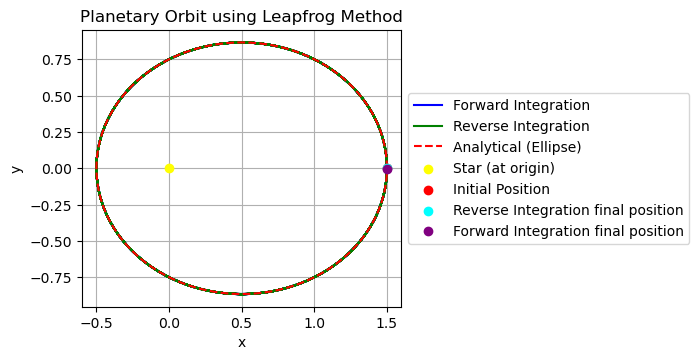

Position error after time-reversal: 1.0525656635569097e-13
Velocity error after time-reversal: 6.895476152595932e-14
0.0023036021728883617
Time-reversibility: Yes


In [146]:
# initial conditions
R = np.array([a*(1+e),0])
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))])

x_pos_leap = [R[0]]
y_pos_leap = [R[1]]
x_pos_leap_back = []
y_pos_leap_back = []

def leapfrog(R,V):
    R_dash = R + (h/2) * V
    F = gravitational_force(R_dash)
    V_new = V + h * F
    R_new = R_dash + (h/2) * V_new
    return V_new, R_new

for i in range(N*num_steps):
    V,R = leapfrog(R,V)
    x_pos_leap.append(R[0])
    y_pos_leap.append(R[1])
    
V = -V

# Integrate backward in time
for i in range(N * num_steps):
    V, R = leapfrog(R, V)  
    x_pos_leap_back.append(R[0])
    y_pos_leap_back.append(R[1])

V = -V

# Plotting the results
plt.figure()
plt.plot(x_pos_leap, y_pos_leap, label='Forward Integration', color='blue')
plt.plot(x_pos_leap_back, y_pos_leap_back, label='Reverse Integration', color='green')
plt.plot(ellipse[0], ellipse[1], label='Analytical (Ellipse)', color='red', linestyle='--')
plt.scatter(0, 0, color='yellow', label='Star (at origin)', zorder=5)  # The star is at the origin
plt.scatter(a * (1 + e), 0, color='red', label='Initial Position', zorder=5)
plt.scatter(x_pos_leap_back[-1], y_pos_leap_back[-1], color='cyan', label='Reverse Integration final position', zorder=5)
plt.scatter(x_pos_leap[-1], y_pos_leap[-1], color='purple', label='Forward Integration final position', zorder=5)  # Final point of forward integration
plt.title('Planetary Orbit using Leapfrog Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()  # Adjust layout to fit the legend outside
plt.show()

# Error between initial and final positions and velocities
position_error = np.linalg.norm(R - np.array([a * (1 + e), 0]))
velocity_error = np.linalg.norm(V - np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))]))

print(f"Position error after time-reversal: {position_error}")
print(f"Velocity error after time-reversal: {velocity_error}")

is_time_reversible = position_error < 1e-10 and velocity_error < 1e-10
print("Time-reversibility:", "Yes" if is_time_reversible else "No")

### Confirming Time-Reversibility of Leapfrog

#### Calculating Error in position after the first 10 forward orbits 
To show that the error in leapfrog is significant and that by reversing the velocity and integrating backwards in time, we have undone this error.

In [147]:
error = np.linalg.norm(np.array([x_pos_leap[N*num_steps],y_pos_leap[N*num_steps]]) - np.array([a * (1 + e), 0]))

In [149]:
print('The error in position after 10 forward orbits is: ', error, 'This is significant compared to the error in position after 10 forwards orbits and then 10 reverse orbits, therefore proving that leapfrog is time-reversible, and not that the leapfrog method is just very accurate')

The error in position after 10 forward orbits is:  0.0023036021728883617 This is significant compared to the error in position after 10 forwards orbits and then 10 reverse orbits, therefore proving that leapfrog is time-reversible, and not that the leapfrog method is just very accurate


#### Increasing the time-step so that errors are more visible

In [152]:
num_steps = 50  # force evaluations per orbit
h = 2 * np.pi / num_steps  # Time step

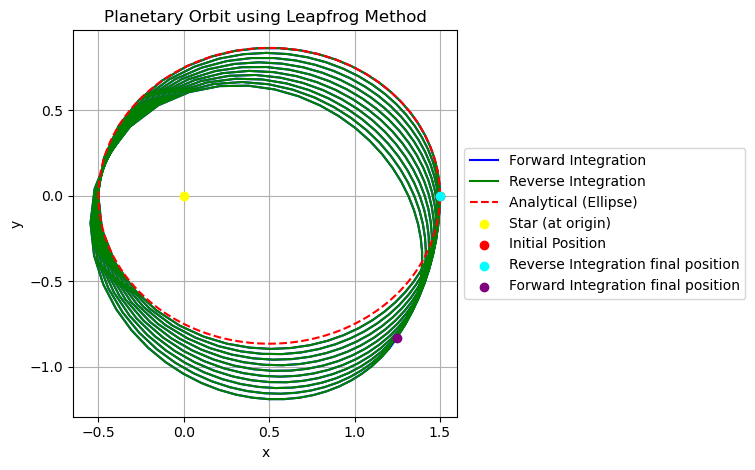

Position error after time-reversal: 1.6033761646907944e-13
Velocity error after time-reversal: 1.245313783537357e-13
Error in position after integrating forward for 10 orbits:  0.8691750709381495
Time-reversibility: Yes


In [154]:
# initial conditions
R = np.array([a*(1+e),0])
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))])

x_pos_leap = [R[0]]
y_pos_leap = [R[1]]
x_pos_leap_back = []
y_pos_leap_back = []

def leapfrog(R,V):
    R_dash = R + (h/2) * V
    F = gravitational_force(R_dash)
    V_new = V + h * F
    R_new = R_dash + (h/2) * V_new
    return V_new, R_new

for i in range(N*num_steps):
    V,R = leapfrog(R,V)
    x_pos_leap.append(R[0])
    y_pos_leap.append(R[1])
 
error = np.linalg.norm(R - np.array([a * (1 + e), 0]))

V = -V

# Integrate backward in time
for i in range(N * num_steps):
    V, R = leapfrog(R, V)  
    x_pos_leap_back.append(R[0])
    y_pos_leap_back.append(R[1])

V = -V

# Plotting the results
plt.figure()
plt.plot(x_pos_leap, y_pos_leap, label='Forward Integration', color='blue')
plt.plot(x_pos_leap_back, y_pos_leap_back, label='Reverse Integration', color='green')
plt.plot(ellipse[0], ellipse[1], label='Analytical (Ellipse)', color='red', linestyle='--')
plt.scatter(0, 0, color='yellow', label='Star (at origin)', zorder=5)  # The star is at the origin
plt.scatter(a * (1 + e), 0, color='red', label='Initial Position', zorder=5)
plt.scatter(x_pos_leap_back[-1], y_pos_leap_back[-1], color='cyan', label='Reverse Integration final position', zorder=5)
plt.scatter(x_pos_leap[-1], y_pos_leap[-1], color='purple', label='Forward Integration final position', zorder=5)  # Final point of forward integration
plt.title('Planetary Orbit using Leapfrog Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()  # Adjust layout to fit the legend outside
plt.show()

# Error between initial and final positions and velocities
position_error = np.linalg.norm(R - np.array([a * (1 + e), 0]))
velocity_error = np.linalg.norm(V - np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))]))

print(f"Position error after time-reversal: {position_error}")
print(f"Velocity error after time-reversal: {velocity_error}")
print('Error in position after integrating forward for 10 orbits: ',error)

is_time_reversible = position_error < 1e-10 and velocity_error < 1e-10
print("Time-reversibility:", "Yes" if is_time_reversible else "No")

can we prove analytically that leapfrog is time reversible?

## Runge Kutte (RK4)

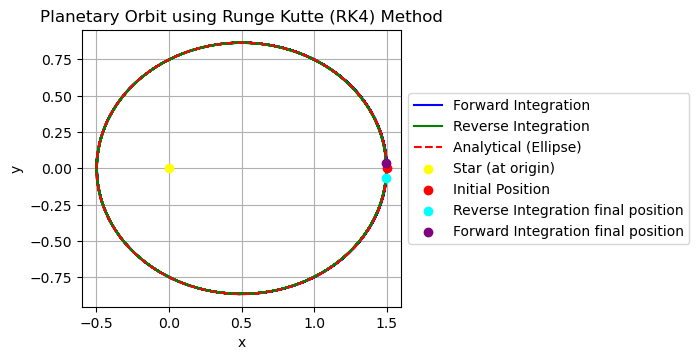

Position error after time-reversal: 0.06748110812972698
Velocity error after time-reversal: 0.05182913087977171
Time-reversibility: No


In [155]:
num_steps = 75  # force evaluations per orbit
h = P / num_steps  # Time steps

# Initial conditions
R = np.array([a * (1 + e), 0])  # Initial position
V = np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))])  # Initial velocity
W = np.array([R, V])  

x_pos_rk4, y_pos_rk4 = [R[0]], [R[1]]
x_pos_rk4_back = []
y_pos_rk4_back = []

def f(W):
    r = np.linalg.norm(W[0])  # Magnitude of position vector R
    return np.array([W[1], -GM * W[0] / r**3]) 

def RK4(W):
    
    k1 = h * f(W)
    k2 = h * f(W + 0.5 * k1)
    k3 = h * f(W + 0.5 * k2)
    k4 = h * f(W + k3)
    W = W + (k1 + 2 * k2 + 2 * k3 + k4) / 6 
    return W
   
for i in range(N*num_steps):
    W = RK4(W)
    x_pos_rk4.append(W[0][0])
    y_pos_rk4.append(W[0][1])

W[1] = -W[1]

# Integrate backwards in time
for i in range(N*num_steps):
    W = RK4(W)
    x_pos_rk4_back.append(W[0][0])
    y_pos_rk4_back.append(W[0][1])

W[1] = -W[1]

# Plotting the results
plt.figure()
plt.plot(x_pos_rk4, y_pos_rk4, label='Forward Integration', color='blue')
plt.plot(x_pos_rk4_back, y_pos_rk4_back, label='Reverse Integration', color='green')
plt.plot(ellipse[0], ellipse[1], label='Analytical (Ellipse)', color='red', linestyle='--')
plt.scatter(0, 0, color='yellow', label='Star (at origin)', zorder=5)  # The star is at the origin
plt.scatter(a * (1 + e), 0, color='red', label='Initial Position', zorder=5)
plt.scatter(x_pos_rk4_back[-1], y_pos_rk4_back[-1], color='cyan', label='Reverse Integration final position', zorder=5)
plt.scatter(x_pos_rk4[-1], y_pos_rk4[-1], color='purple', label='Forward Integration final position', zorder=5)  # Final point of forward integration
plt.title('Planetary Orbit using Runge Kutte (RK4) Method')
plt.xlabel('x')
plt.ylabel('y')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')
plt.tight_layout()  # Adjust layout to fit the legend outside
plt.show()

# Error between initial and final positions and velocities
position_error = np.linalg.norm(W[0] - np.array([a * (1 + e), 0]))
velocity_error = np.linalg.norm(W[1] - np.array([0, np.sqrt(GM * (1 - e) / (a * (1 + e)))]))

print(f"Position error after time-reversal: {position_error}")
print(f"Velocity error after time-reversal: {velocity_error}")

is_time_reversible = position_error < 1e-10 and velocity_error < 1e-10
print("Time-reversibility:", "Yes" if is_time_reversible else "No")

# Part D

In [156]:
import sympy as sp

**Defining Symbols**

In [157]:
h = sp.symbols('h')
R = sp.symbols('R')
V = sp.symbols('V')
GM = sp.symbols('GM')
r = sp.symbols('r')

**Gravitational Force**

In [158]:
def F(R):
    r_hat = R / r  # Unit vector
    F = -GM * r_hat / r**2
    return F

## Foward Euler

In [159]:
R_new = R + h * V
V_new = V + h * F(R)

j1 = sp.diff(R_new, R)
j2 = sp.diff(R_new, V)
j3 = sp.diff(V_new, R)
j4 = sp.diff(V_new, V)

J = sp.Matrix([[j1, j2], [j3, j4]])
J_simplified = J.applyfunc(sp.simplify)
print('J = ',J_simplified)

det_J = j1 * j4 - j2 * j3

print('Jacobian Determinant = ',det_J)

J =  Matrix([[1, h], [-GM*h/r**3, 1]])
Jacobian Determinant =  GM*h**2/r**3 + 1


## Modified Euler

In [160]:
R_new = R + h * V
V_new = V + h * F(R_new)

j1 = sp.diff(R_new, R)
j2 = sp.diff(R_new, V)
j3 = sp.diff(V_new, R)
j4 = sp.diff(V_new, V)

J = sp.Matrix([[j1, j2], [j3, j4]])
J_simplified = J.applyfunc(sp.simplify)
print('J = ',J_simplified)

det_J = j1 * j4 - j2 * j3

print('Jacobian Determinant = ',det_J)

J =  Matrix([[1, h], [-GM*h/r**3, -GM*h**2/r**3 + 1]])
Jacobian Determinant =  1


## Leapfrog

In [161]:
R_dash = R + (h/2) * V
V_new = V + h * F(R_dash)
R_new = R_dash + (h/2) * V_new

j1 = sp.diff(R_new, R)
j2 = sp.diff(R_new, V)
j3 = sp.diff(V_new, R)
j4 = sp.diff(V_new, V)

J = sp.Matrix([[j1, j2], [j3, j4]])
J_simplified = J.applyfunc(sp.simplify)
print('J = ',J_simplified)

det_J = j1 * j4 - j2 * j3
det_J_simplified =sp.simplify(det_J)

print('Jacobian Determinant = ',det_J_simplified)

J =  Matrix([[-GM*h**2/(2*r**3) + 1, -GM*h**3/(4*r**3) + h], [-GM*h/r**3, -GM*h**2/(2*r**3) + 1]])
Jacobian Determinant =  1
